# Data Exploration of the Credit Card Customers

In this notebook, we will explore the data used in my master's thesis and do some visualizations. The dataset contains 30000 credit card consumers’ payment data from a major bank in Taiwan in 2005 and can be found in the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients).

The dataset can be imported directly to Python using a Python package calls `ucimlrepo`.

## Load the data

In [21]:
# Install the UCI package since it's not integrated in Google Colab
!pip install ucimlrepo

In [22]:
# Install kaleido to render the images as png
!pip install -U kaleido

In [23]:
# Load the function
from ucimlrepo import fetch_ucirepo

# Fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

## Checking the data and changing column names

Based on the documentation:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2: Gender (1 = male; 2 = female).
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X5: Age (year).
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.


In [24]:
# Check what type is X and y
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [25]:
# Let's check the shape of the data
X.shape, y.shape

((30000, 23), (30000, 1))

As explained above, the data has 30000 samples and 23 explanatory variables (or features), as well as 1 target variable.

In [26]:
# Get column names
X.columns, y.columns

(Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
        'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
        'X22', 'X23'],
       dtype='object'),
 Index(['Y'], dtype='object'))

In [27]:
# Changing the column names so it is easier to be understood
new_column_names_X = ['limit',
                    'sex',
                    'education',
                    'marriage',
                    'age',
                    'pay_1',
                    'pay_2',
                    'pay_3',
                    'pay_4',
                    'pay_5',
                    'pay_6',
                    'bill_amt1',
                    'bill_amt2',
                    'bill_amt3',
                    'bill_amt4',
                    'bill_amt5',
                    'bill_amt6',
                    'pay_amt1',
                    'pay_amt2',
                    'pay_amt3',
                    'pay_amt4',
                    'pay_amt5',
                    'pay_amt6',
                    ]
new_column_names_y = ['default']

X.columns = new_column_names_X
y.columns = new_column_names_y

In [28]:
# Check X and y
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   limit      30000 non-null  int64
 1   sex        30000 non-null  int64
 2   education  30000 non-null  int64
 3   marriage   30000 non-null  int64
 4   age        30000 non-null  int64
 5   pay_1      30000 non-null  int64
 6   pay_2      30000 non-null  int64
 7   pay_3      30000 non-null  int64
 8   pay_4      30000 non-null  int64
 9   pay_5      30000 non-null  int64
 10  pay_6      30000 non-null  int64
 11  bill_amt1  30000 non-null  int64
 12  bill_amt2  30000 non-null  int64
 13  bill_amt3  30000 non-null  int64
 14  bill_amt4  30000 non-null  int64
 15  bill_amt5  30000 non-null  int64
 16  bill_amt6  30000 non-null  int64
 17  pay_amt1   30000 non-null  int64
 18  pay_amt2   30000 non-null  int64
 19  pay_amt3   30000 non-null  int64
 20  pay_amt4   30000 non-null  int64
 21  pay_amt5   3

(None, None)

## Changing unknown values

Now, we want to check the values of the categorical features and detect wrong or unknown values.

In [29]:
# Check what unique values are there for the "categorical" variables (they are still integer variables)
print(f"Sex: {X['sex'].unique()} \n")
print(f"Education: {X['education'].unique()} \n")
print(f"Marriage: {X['marriage'].unique()} \n")
print(f"Pay_1: {X['pay_1'].unique()} \n")
print(f"Pay_2: {X['pay_2'].unique()} \n")
print(f"Pay_3: {X['pay_3'].unique()} \n")
print(f"Pay_4: {X['pay_4'].unique()} \n")
print(f"Pay_5: {X['pay_5'].unique()} \n")
print(f"Pay_6: {X['pay_6'].unique()} \n")
print(f"Default: {y['default'].unique()} \n")

Sex: [2 1] 

Education: [2 1 3 5 4 6 0] 

Marriage: [1 2 3 0] 

Pay_1: [ 2 -1  0 -2  1  3  4  8  7  5  6] 

Pay_2: [ 2  0 -1 -2  3  5  7  4  1  6  8] 

Pay_3: [-1  0  2 -2  3  4  6  7  1  5  8] 

Pay_4: [-1  0 -2  2  3  4  5  7  6  1  8] 

Pay_5: [-2  0 -1  2  3  5  4  7  8  6] 

Pay_6: [-2  2  0 -1  3  6  4  7  8  5] 

Default: [1 0] 



The values 0, 5, and 6 in education are not documented, so we will change them to 4 (others).

The value 0 in marriage is also not documented, so we change this to 3 (others).

In [30]:
# Change the undocumented values in education
X['education'] = X['education'].replace([0, 5, 6], 4)

# Change the undocumented values in marriage
X['marriage'] = X['marriage'].replace(0, 3)

<ipython-input-30-c0aaa63f6f11>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-c0aaa63f6f11>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Visualization of the data

Let's do some plotting since the values are all correct and understandable. We have separated X and y from the beginning. We will now combine it.

In [31]:
import pandas as pd

combined_data = pd.concat([X, y], axis=1)
combined_data

,limit,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Demographic overview

We will plot some diagrams of the demograpic using Dash Plotly.

In [32]:
# Install dash
!pip install dash

In [33]:
# Import the packages for visualization
import plotly.graph_objects as go

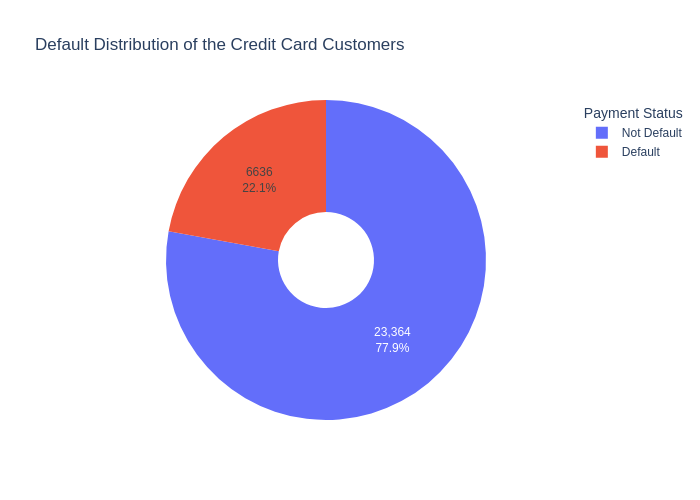

In [34]:
# Let's check the default distribution of the credit card holders
fig_default = go.Figure()
fig_default.add_trace(go.Pie(
    #labels=combined_data['default'].value_counts().reset_index()['default'],
    labels=["Not Default", "Default"],
    values=combined_data['default'].value_counts().reset_index()['count'],
    textinfo='value+percent',
    hole=0.3
))

fig_default.update_layout(
    title='Default Distribution of the Credit Card Customers',
    legend=dict(title_text="Payment Status")
)

fig_default.show("png")

In [35]:
# Create a function that group the dataset based on chosen feature and the default status, and calculate the percentage value of each category in a feature
def group_and_get_percentage(dataframe, feature):
  data_group = pd.DataFrame()
  data_group = dataframe.groupby([feature, 'default']).size().reset_index()
  data_group['percentage'] = dataframe.groupby([feature, 'default']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
  return data_group

In [36]:
test_function = group_and_get_percentage(combined_data, 'education')

In [37]:
test_function[0]

,0
0,8549
1,2036
2,10700
3,3330
4,3680
5,1237
6,435
7,33


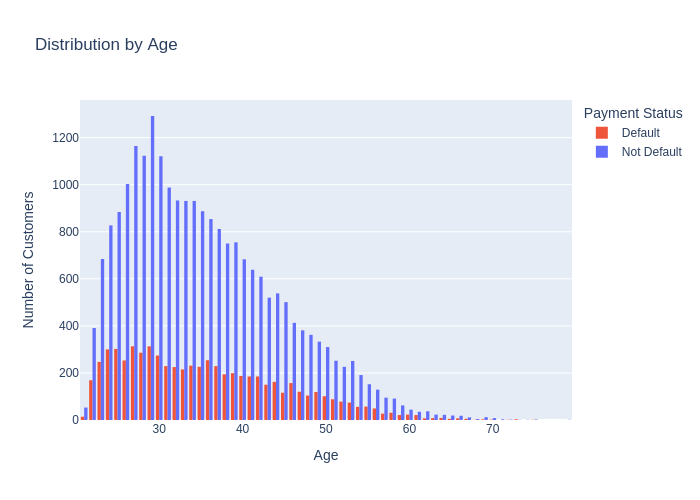

In [38]:
# Let's check the distribution of age
import plotly.express as px

fig_age = px.histogram(
            combined_data,
            x="age",
            color="default",
            color_discrete_sequence=["#EF553B", "#636EFA"],
            title="Distribution by Age",
            barmode="group"
        )

fig_age.update_layout(yaxis_title="Number of Customers",
                      xaxis_title="Age",
                      legend=dict(
                          title_text="Payment Status"
                      ))

fig_age.for_each_trace(lambda t: t.update(name=t.name.replace('0', 'Not Default').replace('1', 'Default')))

fig_age.show("png")

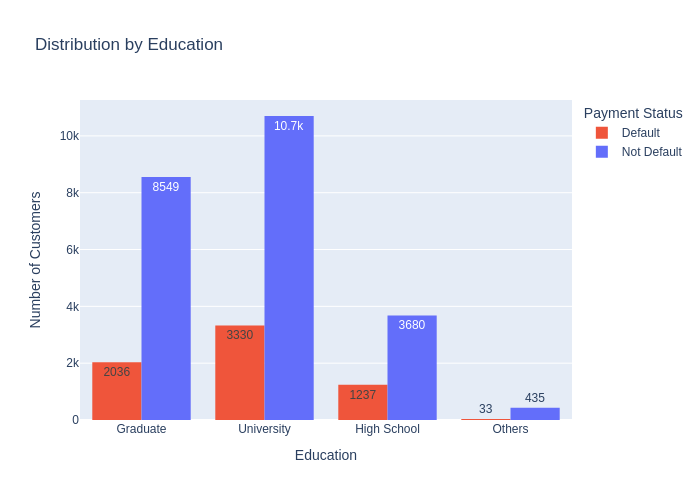

In [39]:
# Let's check the education
fig_edu = px.histogram(
    combined_data,
    x="education",
    color="default",
    color_discrete_map={0: "#636EFA", 1 : "#EF553B"},
    title="Distribution by Education",
    text_auto=True,
    barmode="group"
)

fig_edu.update_layout(bargap=0.2,
                      yaxis_title="Number of Customers",
                      xaxis_title="Education",
                      legend=dict(
                          title_text="Payment Status"
                      ))

fig_edu.for_each_trace(lambda t: t.update(name=t.name.replace('0', 'Not Default').replace('1', 'Default')))

#fig_edu.update_traces(texttemplate=percent_edu['percentage'].apply(lambda x: '{0:1.2f}%'.format(x)), textposition='outside')

fig_edu.update_xaxes(
    ticktext=['Graduate', 'University', 'High School', 'Others'],
    tickvals=[1,2,3,4]
)


fig_edu.show("png")

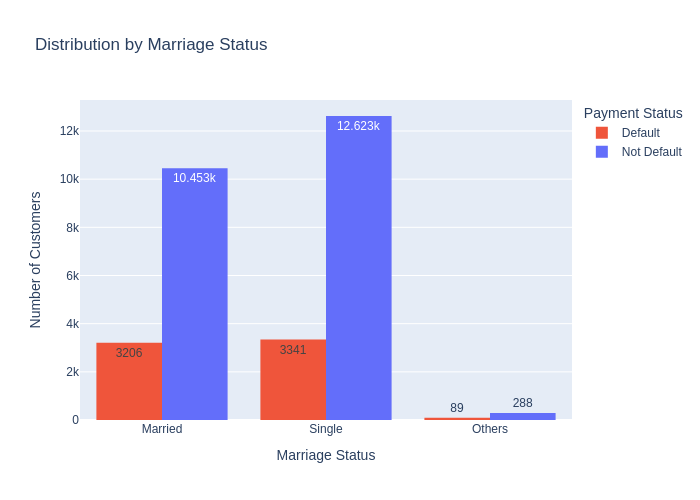

In [40]:
# Let's check the marriage status
!pip install -U kaleido

fig_mar = px.histogram(
    combined_data,
    x="marriage",
    color="default",
    color_discrete_map={0: "#636EFA", 1 : "#EF553B"},
    title="Distribution by Marriage Status",
    barmode="group",
    text_auto=True
)

fig_mar.update_layout(bargap=0.2,
                      yaxis_title="Number of Customers",
                      xaxis_title="Marriage Status",
                      legend=dict(
                          title_text="Payment Status"
                      ))

fig_mar.for_each_trace(lambda t: t.update(name=t.name.replace('0', 'Not Default').replace('1', 'Default')))

fig_mar.update_xaxes(
    ticktext=['Married', 'Single', 'Others'],
    tickvals=[1,2,3]
)

fig_mar.show("png")